## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de La Computación
## Carrera: Ingenieria en Computación Inteligente
## Semestre: Agosto_Diciembre del 2025
### Curso: Lenguajes Inteligentes
### Maestro: Dr. Francisco Javier Luna Rosas
### Alumnos:
* Vanessa Reteguín - 375533
* Alan Josué García Quintero - 379985
* Eduardo Isaí López García - 382965
* Dairon Tadeo García Medina - 243395
* Jesús Yocsan Luevano Flores - 374408

## Tecnicas para el Procesamiento de Imagenes (Visualización de Datos)
El procesamiento digital de imágenes es el conjunto de técnicas que se aplican a las imágenes digitales con el objetivo de mejorar la calidad o facilitar la búsqueda de información.

# Documentación y recursos consultados
[1] Transforming Images: RGB to Grayscale and Gamma Correction with Python: https://medium.com/@sinhaaa003/transforming-images-rgb-to-grayscale-and-gamma-correction-with-python-fe5a0afa12b9

[2] Canny Edge Detection: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

[3] Laplacian of Gaussian Filter (LoG) for Image Processing: https://medium.com/@rajilini/laplacian-of-gaussian-filter-log-for-image-processing-c2d1659d5d2

[4] Exploring Edge Detection in Python: 2- Sobel Edge Detector: A Closer Look: https://medium.com/@erhan_arslan/exploring-edge-detection-in-python-2-sobel-edge-detector-a-closer-look-de051a7b56df

[5] Image Preprocessing with Computer Vision: Edge Detection Using Prewitt Algorithm: https://medium.com/@hassanjadoon2001/image-preprocessing-with-computer-vision-edge-detection-using-prewitt-algorithm-d4f00a2f1565

[6] Erosion and Dilation of images using OpenCV in Python: https://www.geeksforgeeks.org/python/erosion-dilation-images-using-opencv-python/

[7] Python | Morphological Operations in Image Processing (Opening) | Set-1: https://www.geeksforgeeks.org/python/python-morphological-operations-in-image-processing-opening-set-1/

[8] Image Translation using OpenCV | Python: https://www.geeksforgeeks.org/python/image-translation-using-opencv-python/

[9] Resizing and Rescaling Images with OpenCV: https://opencv.org/blog/resizing-and-rescaling-images-with-opencv/

[10] Skeletonization in Python using OpenCV: https://freedium.cfd/https://medium.com/analytics-vidhya/skeletonization-in-python-using-opencv-b7fa16867331


In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# --- 1. Cargar imagen ---
# ruta = input("Ingresa la ruta de la imagen: ")  # ejemplo: "imagen.jpg"
ruta = "/content/ChalkOwl.jpg"
imagen = cv2.imread(ruta)

if imagen is None:
    print("No se pudo cargar la imagen. Verifica la ruta.")
    exit()

In [51]:
# --- 2. Escala de grises ---
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

In [52]:
# --- 3. Negativo ---
negativo = cv2.bitwise_not(imagen)

In [53]:
# --- 4. Potencia (corrección gamma) --- [1]
gamma = 2.2
gamma_corrected = np.array(255 * (imagen / 255) ** gamma, dtype='uint8')

In [54]:
# --- 5. Binarización ---
_, binaria = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY)

In [55]:
# --- 6. Bordes --- [2]
Bordes_img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(Bordes_img,100,200)

In [56]:
# --- 7. Laplace --- [3]
Laplace_img = cv2.imread(ruta, cv2.IMREAD_COLOR)
Laplace_img = cv2.GaussianBlur(Laplace_img, (3, 3), 0)
image_gray = cv2.cvtColor(Laplace_img, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Laplacian(image_gray, cv2.CV_16S, ksize=9)

In [57]:
# --- 8. Sobel --- [4]
image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
# Apply Sobel operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
# Calculate gradient magnitude
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
# Apply a threshold to identify edges
threshold = 50
edge_image = magnitude > threshold

In [58]:
# --- 9. Prewitt --- [5]
Prewitt_image = cv2.imread(ruta)
gray_image = cv2.cvtColor(Prewitt_image, cv2.COLOR_BGR2GRAY)
# Apply Gaussian blur
Prewitt_img_gaussian = cv2.GaussianBlur(gray_image, (3, 3), 0)
# Prewitt Operator
kernelPrewittx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernelPrewitty = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# Apply Prewitt X Kernel
img_prewittx = cv2.filter2D(Prewitt_img_gaussian, -1, kernelPrewittx)
# Apply Prewitt Y Kernel
img_prewitty = cv2.filter2D(Prewitt_img_gaussian, -1, kernelPrewitty)
# Combine the two images
img_prewitt = img_prewittx + img_prewitty
# Convert the image back to uint8
img_prewitt_uint8 = cv2.convertScaleAbs(img_prewitt)

In [59]:
# --- 10. Erosión --- [6]
Erosion_img = cv2.imread(ruta, 0)
Erosion_kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(Erosion_img, Erosion_kernel, iterations=1)

In [60]:
# --- 11. Dilatación --- [6]
Dilatation_img = cv2.imread(ruta, 0)
dilatation_kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(Dilatation_img, dilatation_kernel, iterations=1)

In [61]:
# --- 12. Apertura (Opening) --- [7]
Opening_img = cv2.imread(ruta, 0)
# Define 5x5 structuring element (kernel)
Opening_kernel = np.ones((3, 3), np.uint8)
# Apply Opening to remove small white noise
opening = cv2.morphologyEx(Opening_img, cv2.MORPH_OPEN, Opening_kernel)

In [62]:
# --- 13. Cierre (Closing) --- [7]
Closing_img = cv2.imread(ruta, 0)
Closing_kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(Closing_img, cv2.MORPH_CLOSE, Closing_kernel)

In [63]:
# --- 14. Rotación ---
h, w = imagen.shape[:2]   # alto, ancho
centro = (w // 2, h // 2)
angulo = 45              # grados de rotación
escala = 1.0
matriz_rotacion = cv2.getRotationMatrix2D(centro, angulo, escala)
rotada = cv2.warpAffine(imagen, matriz_rotacion, (w, h))


In [64]:
# --- 15. Traslación --- [8]
traslation_image = cv2.imread(ruta)
height, width = traslation_image.shape[:2]
quarter_height, quarter_width = height / 4, width / 4
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
img_translation = cv2.warpAffine(image, T, (width, height))

In [65]:
# --- 16. Escalamiento --- [9]
rezie_image = cv2.imread(ruta)
new_width = 300
new_height = 250
resized_image = cv2.resize(rezie_image, (new_width, new_height))

In [66]:
# --- 17. Esquelitización --- [10]
# Read the image as a grayscale image
img_skeletonization = cv2.imread(ruta, 0)
# Threshold the image
ret,img_skeletonization = cv2.threshold(img_skeletonization, 127, 255, 0)
# Step 1: Create an empty skeleton
size = np.size(img_skeletonization)
skel = np.zeros(img_skeletonization.shape, np.uint8)
# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img_skeletonization, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img_skeletonization, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img_skeletonization, element)
    skel = cv2.bitwise_or(skel,temp)
    img_skeletonization = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img_skeletonization)==0:
        break

In [67]:
# --- X. Abrillantar (potenciar brillo) ---
brillo = cv2.convertScaleAbs(imagen, alpha=1.2, beta=30)

In [68]:
# ---- Mostrar imágenes ----
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

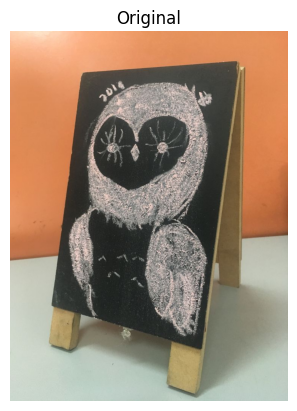

In [90]:
### Original
plt.subplot(1, 1, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

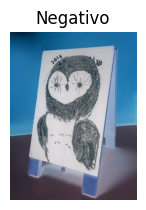

In [101]:
### Negativo
plt.subplot(2, 1, 1)
plt.title("Negativo")
plt.imshow(cv2.cvtColor(negativo, cv2.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

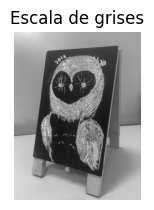

In [107]:
### Escala de grises
plt.subplot(2, 1, 1)
plt.title("Escala de grises")
plt.imshow(gris, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

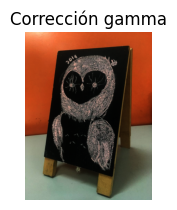

In [108]:
### Potencia (corrección gamma) [1]
plt.subplot(2, 1, 1)
plt.title("Corrección gamma")
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

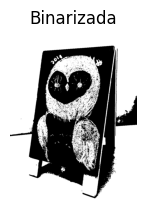

In [109]:
### Binarizada
plt.subplot(2, 1, 1)
plt.title("Binarizada")
plt.imshow(binaria, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

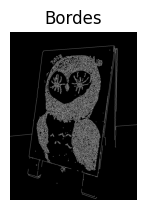

In [110]:
### Bordes [2]
plt.subplot(2, 1, 1)
plt.title("Bordes")
plt.imshow(edges, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

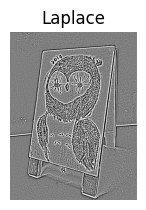

In [111]:
### Laplace [3]
plt.subplot(2, 1, 1)
plt.title("Laplace")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

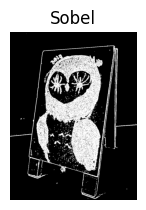

In [112]:
### Sobel [4]
plt.subplot(2, 1, 1)
plt.title("Sobel")
plt.imshow(edge_image, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

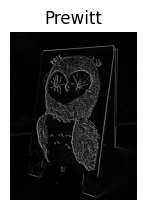

In [113]:
### Prewitt [5]
plt.subplot(2, 1, 1)
plt.title("Prewitt")
plt.imshow(img_prewitt_uint8, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

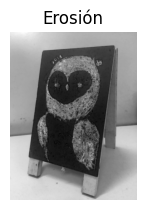

In [114]:
### Erosión [6]
plt.subplot(2, 1, 1)
plt.title("Erosión")
plt.imshow(img_erosion, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

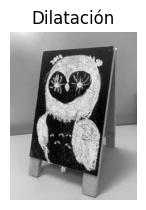

In [115]:
### Dilatación [6]
plt.subplot(2, 1, 1)
plt.title("Dilatación")
plt.imshow(img_dilation, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

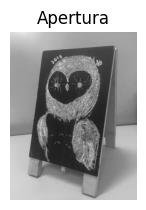

In [116]:
### Apertura [7]
plt.subplot(2, 1, 1)
plt.title("Apertura")
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.axis('off')


(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

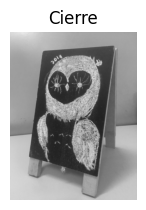

In [117]:
### Cierre [7]
plt.subplot(2, 1, 1)
plt.title("Cierre")
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

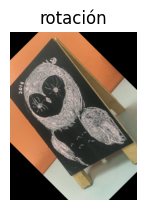

In [118]:
### Rotación
plt.subplot(2, 1, 1)
plt.title("rotación")
plt.imshow(cv2.cvtColor(rotada, cv2.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

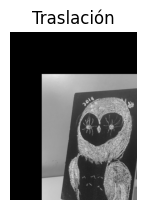

In [119]:
### Traslación [8]
plt.subplot(2, 1, 1)
plt.title("Traslación")
plt.imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(299.5), np.float64(249.5), np.float64(-0.5))

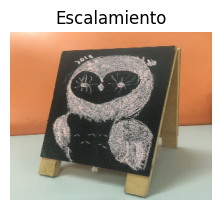

In [120]:
### Escalamiento [9]
plt.subplot(2, 1, 1)
plt.title("Escalamiento")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(735.5), np.float64(980.5), np.float64(-0.5))

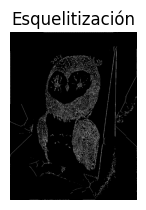

In [121]:
### Esquelitización [10]
plt.subplot(2, 1, 1)
plt.title("Esquelitización")
plt.imshow(cv2.cvtColor(skel, cv2.COLOR_BGR2RGB))
plt.axis('off')

Text(0, 0.5, 'Cantidad de píxeles')

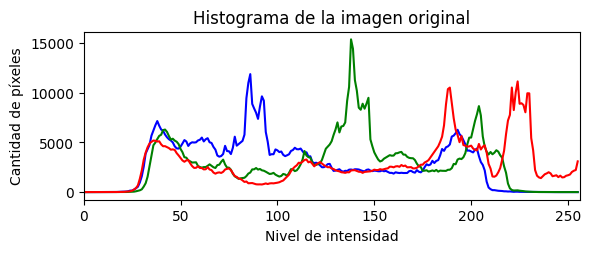

In [87]:
# ---- Histograma ----
# Calcular histograma de la imagen original
color = ('b', 'g', 'r')
plt.subplot(2, 1, 2)
for i, col in enumerate(color):
    hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title("Histograma de la imagen original")
plt.xlabel("Nivel de intensidad")
plt.ylabel("Cantidad de píxeles")

In [88]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>